# Aljowhara Alblaihed

<a id='intro'></a>
##  Diabetes Prediction Project 
The objective of this project is to prodict whether a patient has diabetes or not based on diagnostic measures and they are number of times pregnant, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and	Age.

## Data: https://www.kaggle.com/uciml/pima-indians-diabetes-database
## Table of Contents:
<ul>
<li><a href="#A">Exploratory Data Analysis</a></li>
<li><a href="#B">Data Visualization</a></li>
<li><a href="#C">Split data</a></li>
<li><a href="#D">Scale Data</a></li>   
<li><a href="#E">Create Models</a></li>  
<li><a href="#F">Compare Models before optimize model</a></li>    
<li><a href="#G">optimize Models</a></li>
<li><a href="#H">Compare Models before optimize model</a></li>      
</ul>

# Diabetes Prediction

##### I used  diabetes.csv thats have 9 coulmns inclueds:
##### Pregnancies:Number of times pregnant.
##### Glucose:Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
##### BloodPressure:Diastolic blood pressure (mm Hg).
##### SkinThickness:Triceps skin fold thickness (mm).
##### Insulin:2-Hour serum insulin (mu U/ml).
##### BMI:Body mass index (weight in kg/(height in m)^2)
##### DiabetesPedigreeFunction:Diabetes pedigree function.
##### Age:Age (years).
##### Outcome:Class variable (0 or 1) 268 of 768 are 1, the others are 0, 1 have diabetes and 0 not have diabetes.

## Import Backages

In [2]:
# Make necessary import packages
import pandas as pd #Read Data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Plots
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler #Sale Data
from sklearn.metrics import accuracy_score #Accuracy Score
from sklearn.linear_model import LogisticRegression #Logistic Model
from sklearn.metrics import roc_auc_score #ROC Accuracy Score
from sklearn.metrics import roc_curve
from matplotlib import pyplot #Plots
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV #Optmize model (Grid Search)
from sklearn.linear_model import SGDClassifier #SGD Model
from sklearn.neighbors import KNeighborsClassifier #KNeighbors Model
import warnings #Ignore waenings message
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score #Recall Score
from sklearn.metrics import auc

<a id='A'></a>
# Exploratory Data Analysis


## Read Data

In [3]:
# Read the diabetes data
diabetes = pd.read_csv('diabetes.csv')

## Show Data

In [4]:
# Show the first five rows
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Show the last five rows
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Show data
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
448,0,104,64,37,64,33.6,0.510,22,1
382,1,109,60,8,182,25.4,0.947,21,0
103,1,81,72,18,40,26.6,0.283,24,0
619,0,119,0,0,0,32.4,0.141,24,1


In [7]:
# Data information 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### have 9 coulmns and 768 rows, the coulmns names are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and Outcome.

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Check for missing data

In [9]:
#Check If we have missing values
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Not have zeros values in real data for Glucose, BloodPressure, SkinThickness, Insulin and BMI, so these data as missing values and  I replace all zeros values to median depend on Outcome value if 1 or 0.

## The First step is replace all zeros values to nan values.

In [10]:
#Have zeros values these data as missing values, The First step is replace all zeros values to nan values.
diabetes.Glucose.replace(0, np.nan, inplace=True)
diabetes.BloodPressure.replace(0, np.nan, inplace=True)
diabetes.SkinThickness.replace(0, np.nan, inplace=True)
diabetes.Insulin.replace(0, np.nan, inplace=True)
diabetes.BMI.replace(0, np.nan, inplace=True)

##### The second step is replace all nan values to median depend on Outcome median if 1 or 0.

In [11]:
#The second step is replace all nan values to median depend on Outcome median if 1 or 0.
def median_target(var):   #var is columns
    temp = diabetes[diabetes[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [12]:
print(median_target('Glucose'))
print(f'\n')
print(median_target('BloodPressure'))
print(f'\n')
print(median_target('SkinThickness'))
print(f'\n')
print(median_target('Insulin'))
print(f'\n')
print(median_target('BMI'))

   Outcome  Glucose
0        0    107.0
1        1    140.0


   Outcome  BloodPressure
0        0           70.0
1        1           74.5


   Outcome  SkinThickness
0        0           27.0
1        1           32.0


   Outcome  Insulin
0        0    102.5
1        1    169.5


   Outcome   BMI
0        0  30.1
1        1  34.3


In [13]:
#Replace all nan valuse to median value depend on Outcome value if 1 or 0
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['Glucose'].isnull()), 'Glucose'] = 107.0
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['Glucose'].isnull()), 'Glucose'] = 140.0
#Replace all nan valuse to median value considering if the outcome 0 or 1
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['BloodPressure'].isnull()), 'BloodPressure'] = 74.5
#Replace all nan valuse to median value considering if the outcome 0 or 1
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['SkinThickness'].isnull()), 'SkinThickness'] = 32.0
#Replace all nan valuse to median value considering if the outcome 0 or 1
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['Insulin'].isnull()), 'Insulin'] = 102.5
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['Insulin'].isnull()), 'Insulin'] = 169.5
#Replace all nan valuse to median value considering if the outcome 0 or 1
diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes['BMI'].isnull()), 'BMI'] = 30.1
diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes['BMI'].isnull()), 'BMI'] = 34.3

## Correlation
##### Correlation is a statistical technique that can show whether and how strongly pairs of variables are related and Closer to 1 better is the correlation

In [14]:
# Correlation
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


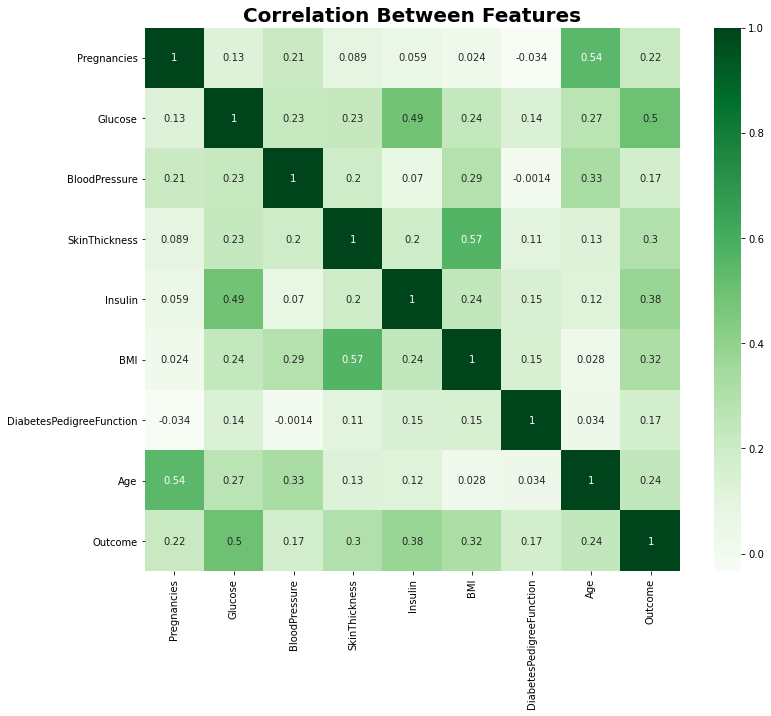

In [15]:
plt.figure(figsize=(12,10)) 
plt.title("Correlation Between Features", fontsize=20, fontweight='bold')
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='Greens')

##### Can see that there is a high correlation between Outcome and Glucose, BMI and Age.

<a id='B'></a>
# Data Visualization 

##### Target Distribution

0    500
1    268
Name: Outcome, dtype: int64

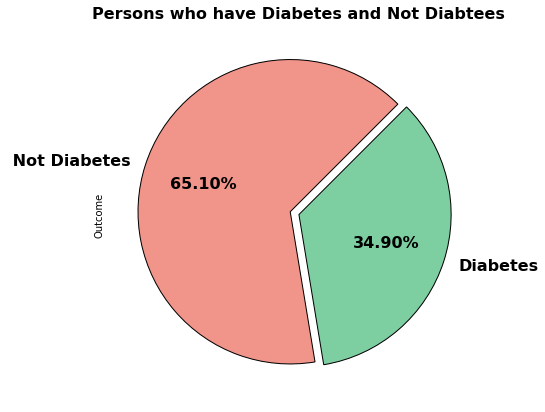

In [16]:
# Target Distribution
plt.figure(figsize=(7,7))
labels= ' Not Diabetes','Diabetes'
plt.title("Persons who have Diabetes and Not Diabtees", fontsize=16, fontweight='bold')
diabetes.Outcome.value_counts().plot.pie(explode= (0.06 , 0.0), autopct='%1.2f%%', startangle=45 ,labels= labels, textprops={'fontsize': 16, 'fontweight':'bold'} ,  
   wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True} ,colors={'#7DCEA0','#F1948A'})
diabetes['Outcome'].value_counts()

##### Observation:The above graph shows that the data is unbalanced because the number of people have not diabetes is 500 and the number of people have diabetes is 268
##### thats means people have diabetes is 34.90% and 65.10% has not diabetes.

## Diabetes Prediction Based on Age

Text(0, 0.5, 'Count')

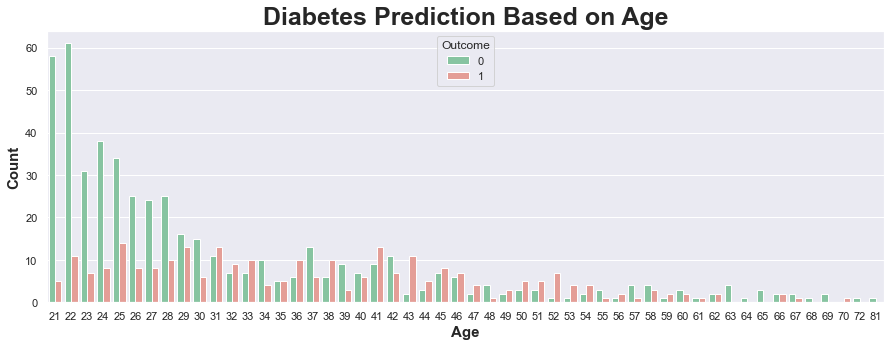

In [17]:
sns.set(rc={'figure.figsize':(15,5)}) 
b = sns.countplot(data=diabetes, x=diabetes.Age ,hue='Outcome', palette= ['#7DCEA0','#F1948A'])
b.axes.set_title("Diabetes Prediction Based on Age",fontsize=25, fontweight='bold')
b.set_xlabel("Age",fontsize=15, fontweight='bold')
b.set_ylabel("Count",fontsize=15, fontweight='bold')

##### We can see an increase in the majority  of outcomes change from 0 to 1 in ages 31-54.

## The Relationship between BMI and Glucose by Diabetes

Text(0.5, 1.0, 'The Relationship between BMI and Glucose by Diabetes')

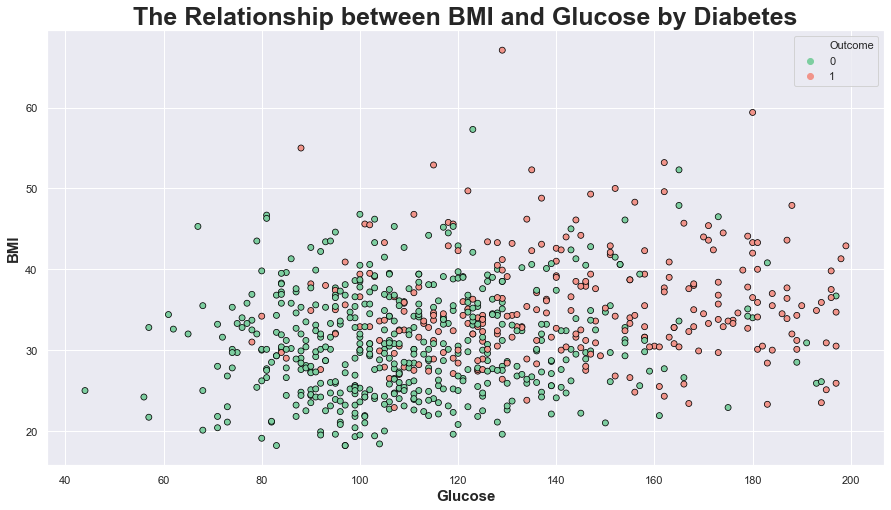

In [18]:
sns.set(rc={'figure.figsize':(15,8)}) #palette ={0 : '#7DCEA0', 1 : '#F1948A'}
S=sns.scatterplot(y='BMI', x='Glucose', hue='Outcome', data=diabetes, palette= ['#7DCEA0','#F1948A'], edgecolor = 'black')
S.set_xlabel("Glucose",fontsize=15, fontweight='bold')
S.set_ylabel("BMI",fontsize=15,  fontweight='bold')
S.axes.set_title("The Relationship between BMI and Glucose by Diabetes",fontsize=25, fontweight='bold')

##### When the BMI and Glucose are increase the number of people have Diabetes increase. 

## Features Relationship based on Outcome (target)

<Figure size 1440x576 with 0 Axes>

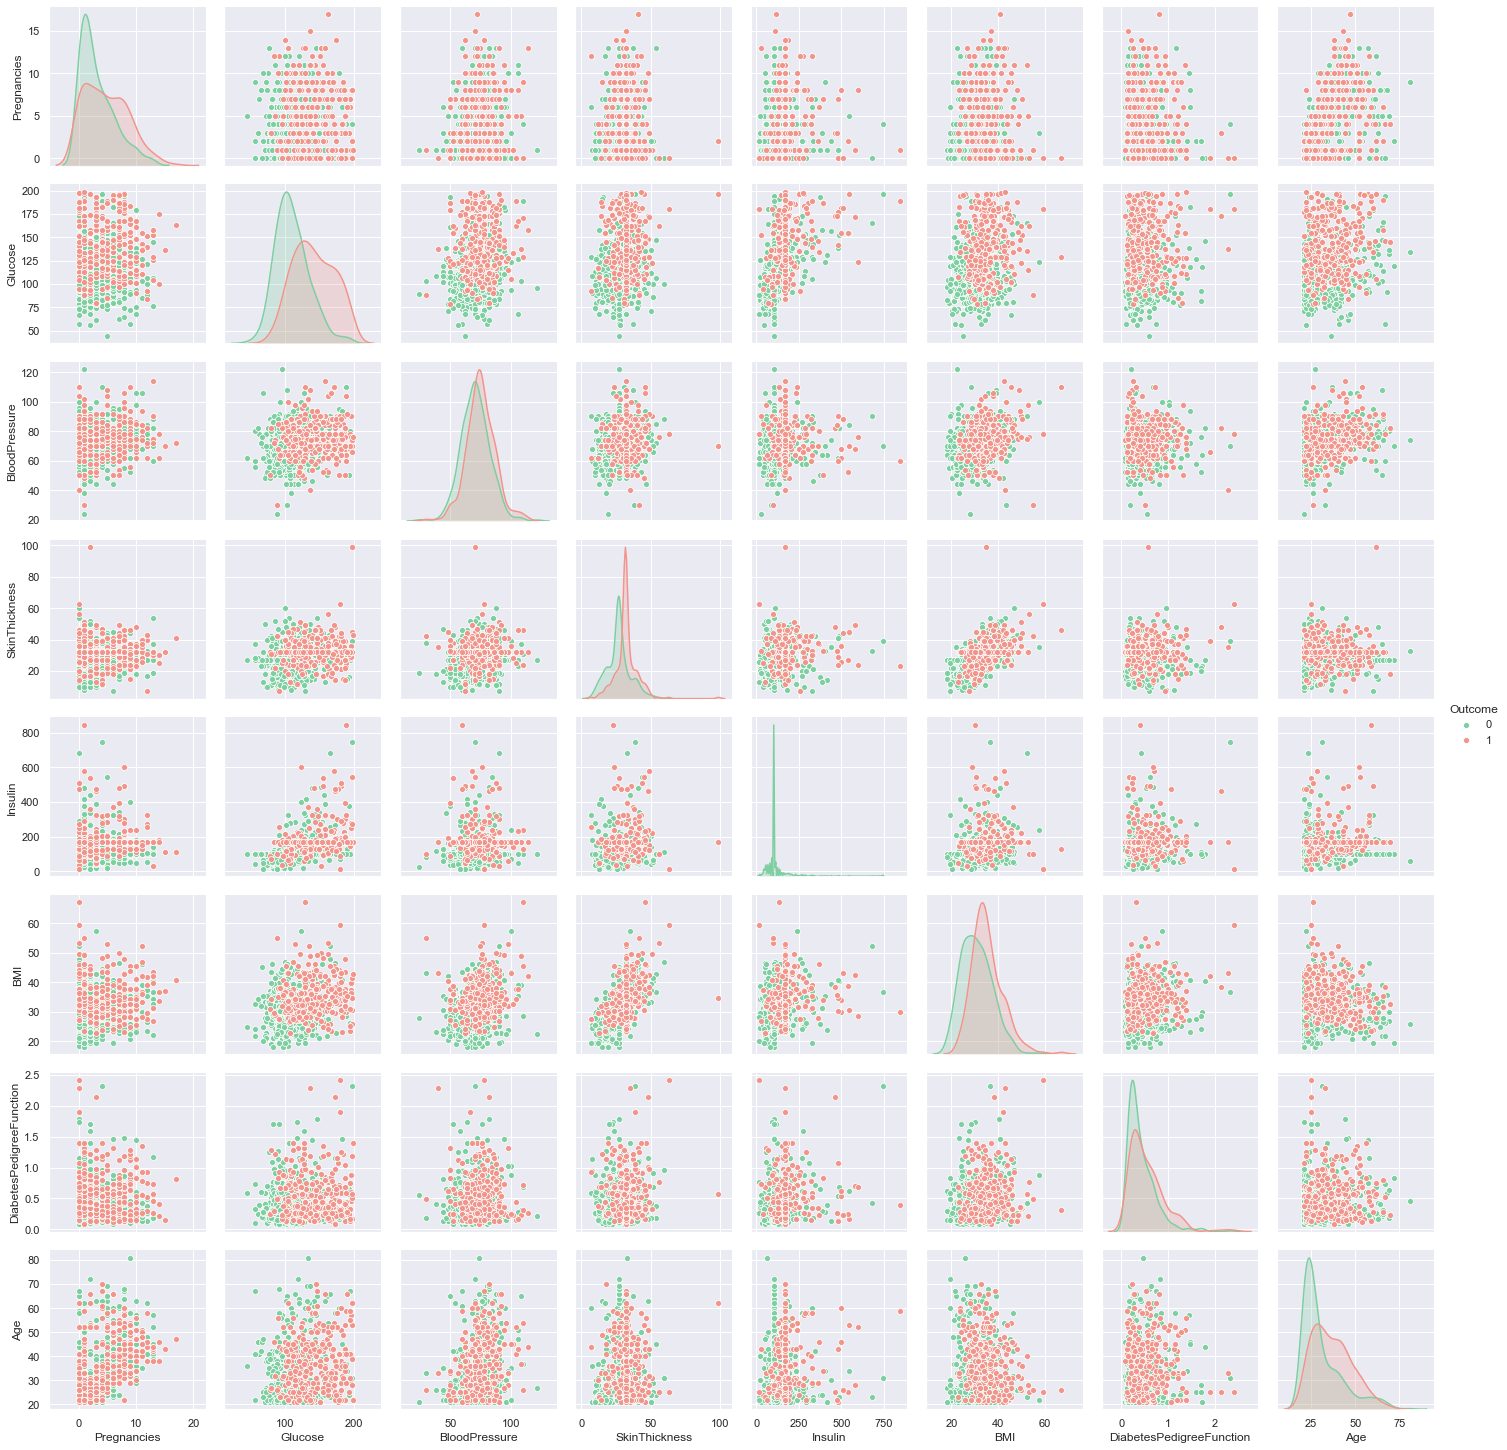

In [19]:
fig=plt.figure(figsize=(20,8))
sns.pairplot(diabetes, hue='Outcome', palette= ['#7DCEA0','#F1948A'])
#plt.title('Features Relationship',fontsize=15, fontweight='bold')
plt.show()

##### Features Relationship based on Outcome (target)

## Disturbuition Values for Each Feature

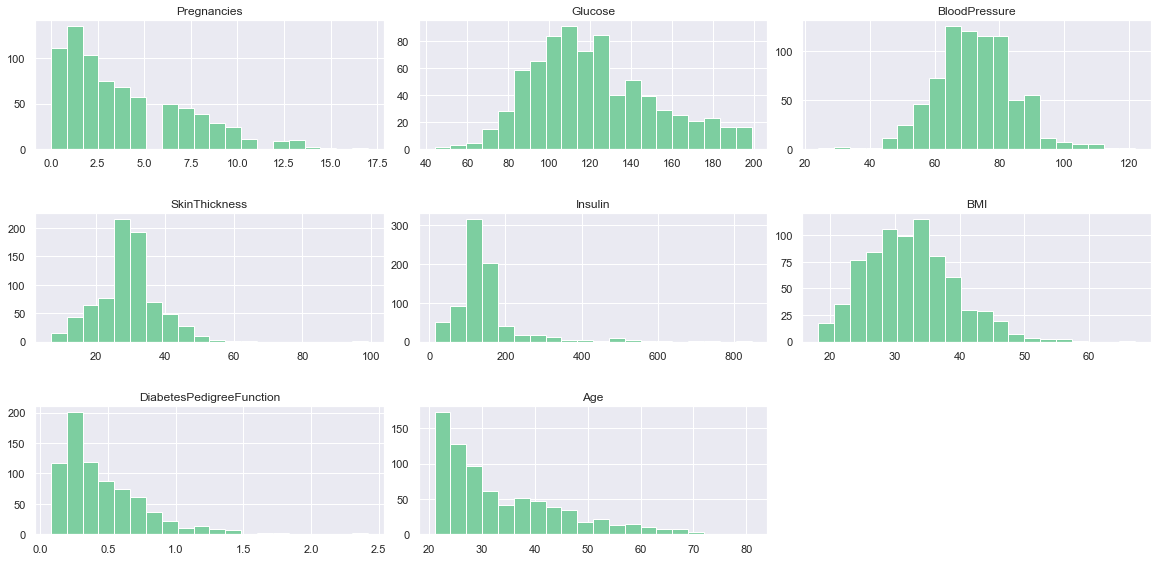

In [20]:
# Histogram of each feature
import itertools

col = diabetes.columns[:8] #All columns rather than target column (Outcome)
plt.subplots(figsize = (20, 13))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    diabetes[i].hist(bins = 20,  color=['#7DCEA0'])
    plt.title(i)
plt.show()

##### Shows us the disturbuition values for each feature 

<a id='C'></a>
# Split data into training and testing datasets

In [21]:
from sklearn.model_selection import train_test_split
x = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness' ,'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes.Outcome

cols = x.columns  #All columns expect the target column (Outcome)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=7)

In [22]:
# Show X_train data
pd.DataFrame(X_train, columns=cols)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
289,5,108.0,72.0,43.0,75.0,36.1,0.263,33
328,2,102.0,86.0,36.0,120.0,45.5,0.127,23
394,4,158.0,78.0,32.0,169.5,32.9,0.803,31
321,3,112.0,74.0,30.0,169.5,31.6,0.197,25
326,1,122.0,64.0,32.0,156.0,35.1,0.692,30
...,...,...,...,...,...,...,...,...
579,2,197.0,70.0,99.0,169.5,34.7,0.575,62
502,6,140.0,68.0,41.0,169.5,39.0,0.727,41
537,0,57.0,60.0,27.0,102.5,21.7,0.735,67
196,1,105.0,58.0,27.0,102.5,24.3,0.187,21


In [23]:
len(X_train), len(y_train) #80% of data for train

(614, 614)

In [24]:
len(X_test), len(y_test) #20% of data for test

(154, 154)

In [25]:
y_train.value_counts(normalize=True)

0    0.656352
1    0.343648
Name: Outcome, dtype: float64

<a id='D'></a>
# Scale Data

In [26]:
scaler = StandardScaler()

cols = x.columns  

# scale the X data
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

##### Need to transform a feature so it is close to normally distributed

<a id='E'></a>
# Create Models

##### Notes 
##### Accuravy
##### Accuravy is one metric for evaluating classification models, Accuracy = TP + TN / TP + TN + FP + FN
##### Recall 
##### What proportion of actual positives was identified correctly?
##### A model that produces no false negatives has a recall of 1.0.
##### Recal = TP / TP + FN

### Baseline Model

In [27]:
def baseline_model(n_predictions, value_to_predict):
    
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_train)  # how many predictions to make? test to train
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class)

baseline_preds=baseline_model(n_predictions, baseline_value)
baseline_preds

0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Length: 614, dtype: int64

In [28]:
# Baseline Prediction
baseline_preds = baseline_model(n_predictions, baseline_value)

In [29]:
# Baseline Accuracy
baseline_accuracy = accuracy_score(y_train, baseline_preds)
baseline_accuracy #>50 is helpful.

0.6563517915309446

##### Accuracy  65.6 %Score, That means our diabetes classifier is doing a great job of identifying if person have diabetes or not.

In [30]:
# Recall Score
recall_score(y_train, baseline_preds) 

0.0

##### Baseline Model has a recall of 0.0 , it correctly identifies 0% of all diabetes.

### Logistic Regression

In [31]:
SL = LogisticRegression(max_iter=100)


In [32]:
#fit Logistic Model
SL.fit(X_train_scaler, y_train)

LogisticRegression()

In [33]:
# Logistic Regression Prediction
SL_pred = SL.predict(X_test_scaler)
SL_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [34]:
# Logistic Regression Accuracy
SL_accuracy=accuracy_score(y_test,SL_pred)
SL_accuracy #76% 

0.7597402597402597

##### Accuracy 75.9 %Score, That means our diabetes classifier is doing a great job of identifying if person have diabetes or not.

In [35]:
# Recall Score
recall_score(y_test, SL_pred) # 0.5 and greater than 0.5 is good

0.543859649122807

##### Logistic Regression Model has a recall of 0.54, it correctly identifies 54% of all diabetes.

### Confusion Matrix for Logistic Regression

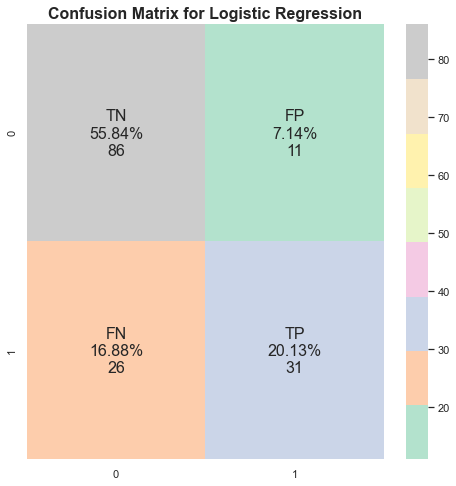

In [36]:
cf = confusion_matrix(y_test, SL_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='',  cmap='Pastel2').set_title("Confusion Matrix for Logistic Regression", fontsize=16, fontweight='bold');

TP = 20.13% predicted diabetes, is diabetes.

FP = 7.14% predicted diabetes, is have not diabetes.

TN = 55.84% predicted not diabetes, is not diabetes.

FN = 16.88% predicted not diabets, is diabetes.

### Stochastic Gradient Descent (SGD) Classifier

In [37]:
sgds = SGDClassifier(max_iter=10000) 

In [38]:
#fit SGD Classifier Model
sgds.fit(X_train_scaler, y_train)

SGDClassifier(max_iter=10000)

In [39]:
# SGDClassifier Prediction
sgds_preds=sgds.predict(X_test_scaler)
sgds_preds

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [40]:
# SGD Classifier Accuracy
sgds_accuracy=accuracy_score(y_test,sgds_preds)
sgds_accuracy 

0.7532467532467533

##### Accuracy 75 %Score, That means our diabetes classifier is doing a great job of identifying if person have diabetes or not.¶

In [41]:
# SGDClassifier Recall Score
recall_score(y_test, sgds_preds)

0.7192982456140351

#### SGD Classifier has a recall of 0.719 in other words, it correctly identifies 71.9% of all diabetes.

### Confusion Matrix for SGD Classifier

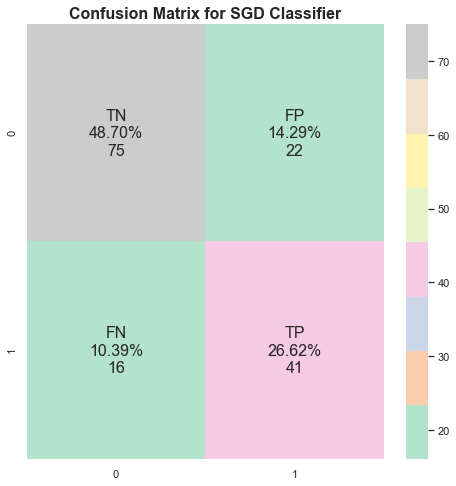

In [42]:
cf = confusion_matrix(y_test, sgds_preds)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='',  cmap='Pastel2').set_title("Confusion Matrix for SGD Classifier",fontsize=16, fontweight='bold');

TP = 26.62% predicted diabetes, is diabetes.

FP = 14.29% predicted diabetes, is have not diabetes.

TN = 48.70% predicted not diabetes, is not diabetes.

FN = 10.39% predicted not diabetes, is diabetes.

### K-Nearest Neighbors (KNN) Model

In [43]:
knns = KNeighborsClassifier(n_neighbors=5)
knns.fit(X_train_scaler, y_train)

KNeighborsClassifier()

In [44]:
knns_preds = knns.predict(X_test_scaler)
knns_preds

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [45]:
knns_accuracy=accuracy_score(y_test,knns_preds) #81%
knns_accuracy #0.8116883116883117

0.8116883116883117

##### Accuracy 81% Score, That means our diabetes classifier is doing a great job of identifying if person havee diabetes or not.¶

In [46]:
# Recall Score
recall_score(y_test, knns_preds)

0.6491228070175439

#### KNeighbors Classifier has a recall of 0.649 in other words, it correctly identifies 64.9% of all diabetes.

### Confusion Matrix for k-nearest Neighbors

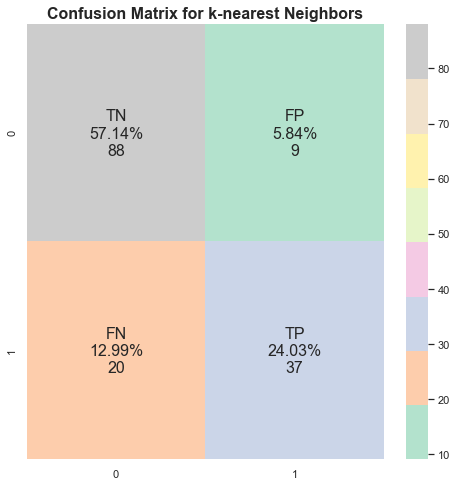

In [47]:
cf = confusion_matrix(y_test, knns_preds)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='',  cmap='Pastel2').set_title("Confusion Matrix for k-nearest Neighbors",fontsize=16, fontweight='bold');

TP = 24.03% predicted diabetes, is diabetes.

FP = 5.84% predicted diabetes, is have not diabetes.

TN = 57.14% predicted not diabetes, is not diabetes.

FN = 12.99% predicted not diabetes , is diabetes.

<a id='F'></a>
# Compare Baseline model and results before optimize model

In [48]:
len(X_train_scaler), len(y_train)

(614, 614)

In [49]:
len(X_test_scaler), len(y_test)

(154, 154)

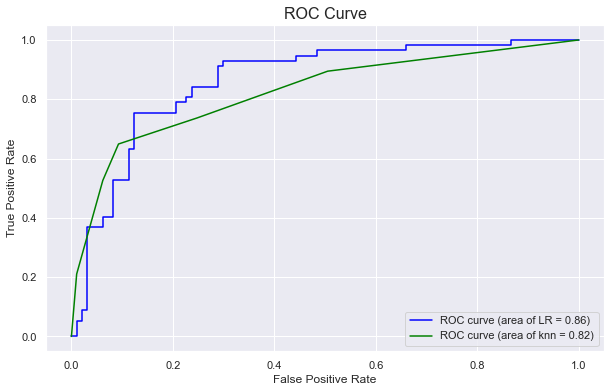

In [53]:
# calculate roc curve
false_positive_rate_lg, true_positive_rate_lg, thresholds_lg = roc_curve(y_test, SL.predict_proba(X_test_scaler)[:,1])
false_positive_rate_knn, true_positive_rate_knn, thresholds_knn = roc_curve(y_test, knns.predict_proba(X_test_scaler)[:,1])

# calculate area under curve 
roc_auc_lg = auc(false_positive_rate_lg, true_positive_rate_lg)
roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)

# figure size
plt.figure(figsize=(10,6))
# plot roc curve
plt.plot(false_positive_rate_lg, true_positive_rate_lg, color='blue', label='ROC curve (area of LR = %0.2f)' % roc_auc_lg)
plt.plot(false_positive_rate_knn, true_positive_rate_knn, color='green', label='ROC curve (area of knn = %0.2f)' % roc_auc_knn)
# add labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add title and specific location of legend
plt.title('ROC Curve', fontsize=16)
# show the plot
plt.legend(loc="lower right")
plt.show()

Basline: ROC AUC=0.500
Logistic: ROC AUC=0.863
KNN ROC AUC=0.824


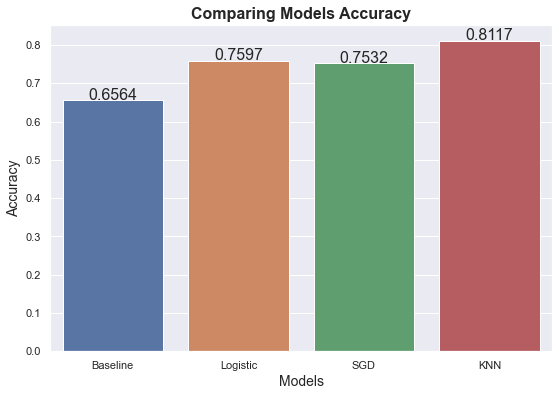

In [71]:
# calculate scores
Basline_auccuracy = roc_auc_score(y_test, baseline_preds[:154])
Logistic_auccuracy = roc_auc_score(y_test, SL.predict_proba(X_test_scaler)[:,1])
#SGD_auccuracy = roc_auc_score(y_test, sgds.predict_proba(X_test_scaler)[:,1])
KNN_auccuracy = roc_auc_score(y_test,  knns.predict_proba(X_test_scaler)[:,1])

# summarize scores
print('Basline: ROC AUC=%.3f' % (Basline_auccuracy))
print('Logistic: ROC AUC=%.3f' % (Logistic_auccuracy))
#print('SGD: ROC AUC=%.3f' % (SGD_auccuracy))
print('KNN ROC AUC=%.3f' % (KNN_auccuracy))

accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic', 'SGD', 'KNN']
accuracies['values'] = [baseline_accuracy  , SL_accuracy, sgds_accuracy, knns_accuracy]

plt.figure(figsize=(9, 6))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy', fontsize=16, fontweight='bold');

###### I achived the best result in k-nearest neighbors Model with ROC AUC 0.824 and accuracy 0.81 score.

<a id='G'></a>
# Optimize Models

### Grid Search for KNN (best model result)

In [56]:
grid_params={
    'n_neighbors':[3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gscaler = GridSearchCV(
KNeighborsClassifier(),
    grid_params,
    verbose =1,
    cv= 5,
    n_jobs =-1

)
resultscaler=gscaler.fit(X_train_scaler, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  73 out of  80 | elapsed:   11.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.5s finished


In [57]:
resultscaler.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [58]:
KNNScaler = KNeighborsClassifier(
                         metric='manhattan',
                         n_neighbors= 19,
                         weights= 'distance'
                         )

In [59]:
KNNScaler.fit(X_train_scaler, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [60]:
KNN_predOps=KNNScaler.predict(X_test_scaler)

In [61]:
KNN_accOps= accuracy_score(y_test, KNN_predOps)
KNN_accOps #0.8441558441558441

0.8441558441558441

##### the accuracy score improvement from 81% to 84%

In [62]:
recall_score(y_test, KNN_predOps)

0.7368421052631579

##### KNeighbors Classifier has a recall of 0.736 in other words, it correctly identifies73.6% of all diabetes

### Confusion Matrix for K-Nearest Neighbors Model after optimize

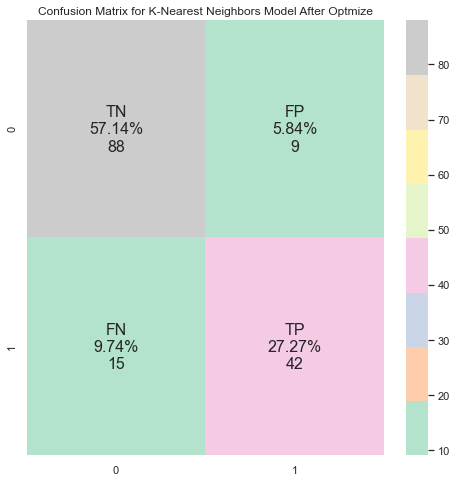

In [63]:
cf = confusion_matrix(y_test, KNN_predOps)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='',  cmap='Pastel2').set_title("Confusion Matrix for K-Nearest Neighbors Model After Optmize");

TP = 27.27% predicted diabetes, is diabetes.

FP = 5.84% predicted diabetes, is have not diabetes.

TN = 57.14% predicted not diabetes, is not diabetes.

FN = 9.74% predicted not diabetes , is diabetes.

<a id='H'></a>
### Compare Models after optimize model

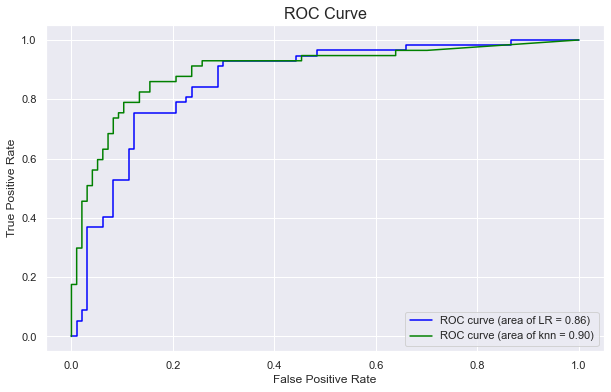

In [75]:
# calculate roc curve
false_positive_rate_lg, true_positive_rate_lg, thresholds_lg = roc_curve(y_test, SL.predict_proba(X_test_scaler)[:,1])
false_positive_rate_knn, true_positive_rate_knn, thresholds_knn = roc_curve(y_test, KNNScaler.predict_proba(X_test_scaler)[:,1])

# calculate area under curve 
roc_auc_lg = auc(false_positive_rate_lg, true_positive_rate_lg)
roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)

# figure size
plt.figure(figsize=(10,6))
# plot roc curve
plt.plot(false_positive_rate_lg, true_positive_rate_lg, color='blue', label='ROC curve (area of LR = %0.2f)' % roc_auc_lg)
plt.plot(false_positive_rate_knn, true_positive_rate_knn, color='green', label='ROC curve (area of knn = %0.2f)' % roc_auc_knn)
# add labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add title and specific location of legend
plt.title('ROC Curve', fontsize=16)
# show the plot
plt.legend(loc="lower right")
plt.show()

Basline: ROC AUC=0.500
Logistic: ROC AUC=0.863
KNN ROC AUC=0.899


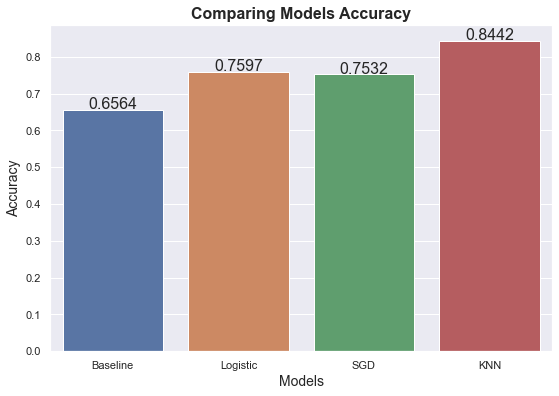

In [74]:
# calculate scores
Basline_auccuracy = roc_auc_score(y_test, baseline_preds[:154])
Logistic_auccuracy = roc_auc_score(y_test, SL.predict_proba(X_test_scaler)[:,1])
#SGD_auccuracy = roc_auc_score(y_test, sgds.predict_proba(X_test_scaler)[:,1])
KNN_auccuracy = roc_auc_score(y_test,  KNNScaler.predict_proba(X_test_scaler)[:,1])

# summarize scores
print('Basline: ROC AUC=%.3f' % (Basline_auccuracy))
print('Logistic: ROC AUC=%.3f' % (Logistic_auccuracy))
#print('SGD: ROC AUC=%.3f' % (SGD_auccuracy))
print('KNN ROC AUC=%.3f' % (KNN_auccuracy))

accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic', 'SGD', 'KNN']
accuracies['values'] = [baseline_accuracy  , SL_accuracy, sgds_accuracy,  KNN_accOps]

plt.figure(figsize=(9, 6))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy', fontsize=16, fontweight='bold');

##### Achived the best result in k-nearest neighbors Model with accuracy 84% score and  ROC AUC 90% 